# Tutorial: Elastic Net

**Lasso**

- L1 regularization
- Learned using coordinate descent algorithm
- Perform both shrinkage and variable selection
- Not stable in front of correlated predictor variables (randomly one variable from those which are correlated)

**Elastic Net**

- Linear regression with combined L1 and L2 priors as regularizer.
- ElasticNet will tend to select more variables hence lead to larger models
- More expensive to train
- The result model is more stable in front of correlated predictor variables, better generalization.


Reference: 

- http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [9]:
# Simluate data

np.random.seed(42)
n_samples, n_features = 50, 200  # p>n

# Features
X = np.random.randn(n_samples, n_features)

# sparsify coef
coef = 3 * np.random.randn(n_features)
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0

# generate response
y = np.dot(X, coef)
y += 0.01 * np.random.normal((n_samples,))

# Split data in train set and test set (half-half)
n_samples = X.shape[0]
X_train, y_train = X[:n_samples / 2], y[:n_samples / 2]
X_test, y_test = X[n_samples / 2:], y[n_samples / 2:]

In [10]:
from sklearn.linear_model import ElasticNet

**Implementation in Sklearn**

Minimize: Object = LS_loss + $\alpha$ $\times$ l1_ratio $\times$ L1 + $\frac{1}{2} \times \alpha$ $\times$ (1-l1_ratio) $\times$ L2

In [12]:
alpha = 0.1
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)

print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.240176


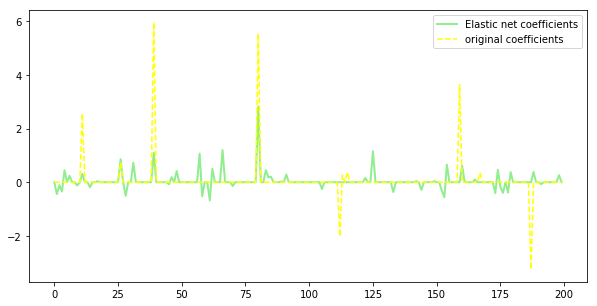

In [18]:
fig = plt.figure(figsize=(10, 5))
plt.plot(enet.coef_, color='lightgreen', linewidth=2,
         label='Elastic net coefficients')
plt.plot(coef, '--', color='yellow', label='original coefficients')
plt.legend(loc='best')